# Exploring data with Pandas

<img src="https://miro.medium.com/max/819/1*Dss7A8Z-M4x8LD9ccgw7pQ.png" width="500px">

Today, we will:

1. Make sure that everyone remembers how to do the basics with `pandas`.
2. Do some data analysis with existing data sets.
3. Make some visualizations of the data.

## Notebook instructions

We will work through the notebook making sure to write all necessary code and answer any questions. We will start together and then you will work on the exercises as a group.

### Outline:

1. [Stellar Classification Dataset - SDSS17](#dataset)
2. [Loading and exploring a dataset](#loading)
3. [Visualizing your data](#visualizing)

### Useful imports (make sure to execute this cell!)
Let's get a few of our imports out of the way. If you find others you need to add, consider coming back and putting them here.

In [27]:
# necessary imports for this notebook
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks') # setting style
sns.set_context('talk') # setting context
sns.set_palette('colorblind') # setting palette

----
<a id="dataset"></a>
## 1. Stellar Classification Dataset - SDSS17

The [Stellar Classification Dataset](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17) is a collection of observations of stars from the Sloan Digital Sky Survey (SDSS). The dataset contains various features of stars, such as their brightness, color, and spectral type, which can be used to classify them into different categories. The data set has 100,000 observations of starts, with 17 features and 1 class column. The features include:

- obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
- alpha = Right Ascension angle (at J2000 epoch)
- delta = Declination angle (at J2000 epoch)
- u = Ultraviolet filter in the photometric system
- g = Green filter in the photometric system
- r = Red filter in the photometric system
- i = Near Infrared filter in the photometric system
- z = Infrared filter in the photometric system
- run_ID = Run Number used to identify the specific scan
- rereun_ID = Rerun Number to specify how the image was processed
- cam_col = Camera column to identify the scanline within the run
- field_ID = Field number to identify each field
- spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
- redshift = redshift value based on the increase in wavelength
- plate = plate ID, identifies each plate in SDSS
- MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
- fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

And the class column is:
- class = object class (galaxy, star or quasar object)

For this exercise, we will use the Stellar Classification Dataset to explore how to load and visualize data using `pandas` and `matplotlib`. Later we will use this dataset for some classification and regression tasks.

---
<a id="loading"></a>
## 2. Loading and exploring a dataset

The goal is typically to read some sort of preexisting data **into** a DataFrame so we can work with it. 

Pandas is pretty flexible about reading in data and can read in a [variety of formats](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html). However, it sometimes needs a little help. We are going to read in a CSV file, which is a common format for data. 

The Stellar Classification dataset is one that has a particularly nice set of features and is of a manageable size such that it can be used as a good dataset for learning new data analysis techiques or testing out code. This allows one to focus on the code and data science methods without getting too caught up in wrangling the data. However, **data wrangling** is an authentic part of doing any sort of meaningful data analysis as data more often messier than not. 

Although you will be working with this dataset today, you may still have to do a bit of wrangling along the way.

### 2.1 Getting used to looking for useful information on the internet

Another authentic part of working as a computational professional is getting comfortable with searching for help on the internet when you get stuck or run into something that is unfamiliar to you. The Python data analysis/computional modeling world can be complicated and is ever-evolving. There is also a large number of publicly available toolsets with varying levels of complexity and nuance. Through practice and experience, we become better computational folks by learning how to search for better, more efficient, and clearer ways to do things. 

Download the data set from [Kaggle](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17) and save it in the same directory as this notebook, or you can use the following code to load it if you cloned the repository.

**Note:** This data is very clean, so the import should work without any issues. If you run into problems, try searching for the error message on the internet or ask for help. It is likely to also find the corrent column names and data types, but if it does not, you can specify them manually. **You are likely to run into this issue with other datasets, so it is good to know how to do this.**


In [28]:
stellar = pd.read_csv('./data/star_classification.csv')
stellar.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


Make a plot of  u vs g, what do you notice?
make sure to label your axes and title your plot.

there's a bad data point, how can you find it?
remove it and plot again.

<Axes: xlabel='u', ylabel='g'>

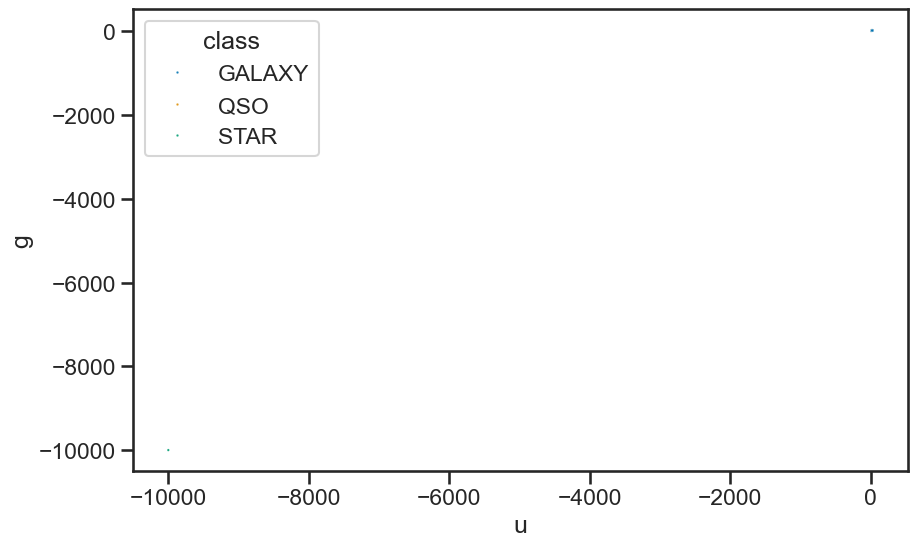

In [30]:
#plotting the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='u', y='g', data=stellar, hue='class', alpha=0.9, s=3)

In [31]:
#order column by the largest number
stellar.iloc[79543,:]

obj_ID         1237648703521095936.0
alpha                     224.006526
delta                      -0.624304
u                            -9999.0
g                            -9999.0
r                            18.1656
i                           18.01675
z                            -9999.0
run_ID                           752
rerun_ID                         301
cam_col                            2
field_ID                         537
spec_obj_ID    3731276904880250368.0
class                           STAR
redshift                    0.000089
plate                           3314
MJD                            54970
fiber_ID                         162
Name: 79543, dtype: object

<Axes: xlabel='u', ylabel='g'>

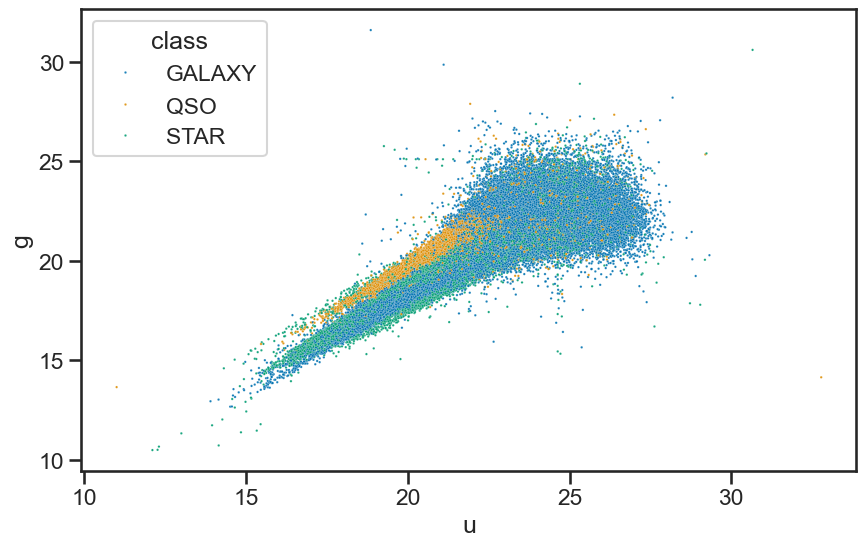

In [32]:
# remove the row 79543
stellar = stellar.drop(79543, axis=0)

#plotting the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='u', y='g', data=stellar, hue='class', alpha=0.9, s=3)

-----
<a id="visualizing"></a>
## 3. Visualizing your data